In [1]:
# We need to think of a better way to compute the forecasted values - the average

In [2]:
# What happense currently?

# We average out the predicted values before transformation, which is not the best thing to do, we need to first do the transformation - and then average things out, let's try computing the metrics this way

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [4]:
# We still need the true counts, so we need the nest few steps, let's leave things as they are

In [5]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0201"

In [6]:
# os.listdir(path_to_dfs)

In [7]:
len(os.listdir(path_to_dfs))

6370

In [8]:
6370/910

7.0

In [9]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [10]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [11]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [12]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [13]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [14]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [15]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [16]:
# ordered_csv_files

In [17]:
# averaged_forecasts_csvs list is pointless at this time?

In [18]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 1.52 s, sys: 279 ms, total: 1.8 s
Wall time: 22.8 s


In [19]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [20]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.005777,0.0,-0.008793,0.0,-0.006146,0.0,0.004816,0.0,-0.014672,...,0.000000e+00,-0.002431,0.0,-0.001711,0.0,-0.002284,0.0,-0.005224,0.0,0.005208
1,0.0,0.001021,0.0,0.003633,0.0,-0.003488,0.0,0.003368,0.0,-0.005259,...,2.317985e-04,-0.004177,0.0,0.002753,0.0,-0.004188,0.0,-0.000814,0.0,0.004201
2,0.0,-0.001544,0.0,-0.000695,0.0,-0.008081,0.0,0.000438,0.0,-0.004590,...,1.185987e-09,-0.007599,0.0,-0.002196,0.0,-0.002343,0.0,-0.003754,0.0,0.001391
3,0.0,0.003831,0.0,0.006051,0.0,-0.002398,0.0,-0.003274,0.0,-0.003589,...,0.000000e+00,-0.007457,0.0,0.004806,0.0,-0.000121,0.0,0.001489,0.0,0.001759
4,0.0,0.001369,0.0,-0.003473,0.0,-0.004376,0.0,-0.000324,0.0,-0.002456,...,0.000000e+00,-0.002928,0.0,-0.000295,0.0,0.005174,0.0,-0.000559,0.0,0.001616


In [21]:
combined_df.shape

(7, 1820)

In [22]:
# get the true values
True_values_df = combined_df[['True_value']]

In [23]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,7.834402e-07,0.000004,0.0,0.0,...,0.0,0.0,0.000002,0.387255,0.026875,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000865,0.294906,2.317985e-04,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000054,0.000619,1.185987e-09,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000567,0.000107,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0


In [24]:
True_values_df.shape

(7, 910)

In [25]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [26]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,7.834405e-07,0.000004,0.0,0.0,...,0.0,0.0,2.478146e-06,0.472933,0.027239,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000866,0.343000,2.318253e-04,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000054,0.000620,1.185987e-09,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,5.671876e-04,0.000107,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,2.057258e-07,0.001316,0.000011,0.000000e+00,0.0,0.0,0.0,0.0


In [27]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [28]:
sum_true_values

0    45.000217
1    45.000040
2    47.000001
3    37.999999
4    42.000041
5    35.000000
6    29.000000
dtype: float64

In [29]:
# # get the forecasted values
# Forecasted_values_df = combined_df[['Forecasted_value']]

In [30]:
# Forecasted_values_df.head()

In [31]:
# exp_forecasted = np.exp(Forecasted_values_df)-1

In [32]:
# exp_forecasted

In [33]:
# set the values to 0 if the forecasted count is negative?

In [34]:
# exp_forecasted[exp_forecasted < 0] = 0

In [35]:
# exp_forecasted.head()

In [36]:
# sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [37]:
# sum_forecasted_values

In [38]:
# now what about the predicted values? we have stored these in terms of npy files, let's see how we can figure out to get the predicted values

In [39]:
all_forecasts_npy_files = []
for file in os.listdir(path_to_dfs):
    if file[:13] == 'all_forecasts':
        all_forecasts_npy_files.append(file)

In [40]:
len(all_forecasts_npy_files)

910

In [41]:
all_forecasts_npy_files[0]

'all_forecasts_sub_273.npy'

In [42]:
sub_273_forecasts = np.load(os.path.join(path_to_dfs, all_forecasts_npy_files[0]))

In [43]:
sub_273_forecasts.shape

(1000, 4, 7)

In [44]:
# Okay, we have the values for the 7 test periods corresponding to the subwindow 273

In [45]:
# we need to first transform the values?

In [46]:
sub_273_forecasts = np.exp(sub_273_forecasts) - 1

In [47]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(-0.55982447, 1.012332)

In [48]:
# get rid of anything below zero?
sub_273_forecasts[sub_273_forecasts < 0] = 0

In [49]:
# sub_273_forecasts

In [50]:
# We can now take the average?

In [51]:
sub_273_forecasts_averged = np.mean(sub_273_forecasts, axis = (0,1))

In [52]:
sub_273_forecasts_averged.shape

(7,)

In [53]:
sub_273_forecasts_averged

array([0.06882609, 0.08126505, 0.09603258, 0.09048121, 0.08183272,
       0.08467064, 0.07325014], dtype=float32)

In [54]:
0.08*910

72.8

In [55]:
sub_273_forecasts.shape

(1000, 4, 7)

In [56]:
# sanity check
for i in range(sub_273_forecasts.shape[-1]):
    track = sub_273_forecasts[:,:,i]
    print(np.mean(track))

0.068826094
0.08126508
0.09603243
0.090481184
0.08183274
0.084670655
0.07325021


In [57]:
# Okay, this is what we need, but what do we need at the end? we need this to happen to all the 910 subwindows and get the means - collect these in a list first?

In [58]:
# all_forecasts_sub_273

In [59]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 860 ms, sys: 332 ms, total: 1.19 s
Wall time: 20.2 s


In [60]:
len(catch_all_averaged_preds)

910

In [61]:
catch_all_averaged_preds[0]

array([0.0006177 , 0.00242227, 0.00081213, 0.00535478, 0.00257849,
       0.0037457 , 0.00280966], dtype=float32)

In [62]:
# make this a dataframe

In [63]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [64]:
Forecasted_values_df.shape

(7, 910)

In [65]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [66]:
sum_forecasted_values

0    47.377132
1    47.645096
2    50.027897
3    52.085495
4    46.566818
5    50.282066
6    52.907433
dtype: float32

In [67]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [68]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [69]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [70]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,45.000217,47.377132
1,45.000040,47.645096
2,47.000001,50.027897
3,37.999999,52.085495
4,42.000041,46.566818
5,35.000000,50.282066
6,29.000000,52.907433


In [71]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

12.22513639658682

In [72]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

9.413091175860899

In [73]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.7227131160459394, pvalue=0.06652978272947589)

In [74]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-3.13738230424026

##### Coverages and widths for the forecasted values?

In [75]:
# for this we need the all_forecasts npy files

In [76]:
# content location is the same path as above

In [77]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [78]:
# all_forecasts_npy_files

In [79]:
# load the npy files

In [80]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 238 ms, sys: 62.4 ms, total: 301 ms
Wall time: 302 ms


In [81]:
len(loaded_npy_files)

910

In [82]:
loaded_npy_files[0].shape

(1000, 7)

In [83]:
loaded_npy_files[0]

array([[-1.4747679e-03,  6.8006068e-03, -1.4442205e-04, ...,
         2.1433979e-03,  4.4095367e-03,  2.0454228e-03],
       [-1.4693886e-03,  7.3255450e-03, -5.2958727e-05, ...,
         2.8418154e-03,  3.6330968e-03,  3.2822639e-03],
       [-3.1006336e-04,  7.2155595e-03,  4.5213103e-04, ...,
         2.7452111e-03,  4.3856800e-03,  3.0914694e-03],
       ...,
       [-2.9700845e-03, -9.0762973e-04,  1.2043864e-03, ...,
         1.1485964e-03,  2.8768927e-03,  1.3967603e-03],
       [-4.0292144e-03, -6.6241622e-04,  1.0789931e-04, ...,
         1.9250959e-03,  2.7119368e-03,  1.1054426e-03],
       [-2.1128207e-03, -1.6999245e-04, -1.6921759e-04, ...,
         3.0154586e-03,  2.9801875e-03,  1.0830462e-03]], dtype=float32)

In [84]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 22.6 ms, sys: 1.35 ms, total: 23.9 ms
Wall time: 23.2 ms


In [85]:
loaded_npy_files[0]

array([[0.        , 0.00680061, 0.        , ..., 0.0021434 , 0.00440954,
        0.00204542],
       [0.        , 0.00732554, 0.        , ..., 0.00284182, 0.0036331 ,
        0.00328226],
       [0.        , 0.00721556, 0.00045213, ..., 0.00274521, 0.00438568,
        0.00309147],
       ...,
       [0.        , 0.        , 0.00120439, ..., 0.0011486 , 0.00287689,
        0.00139676],
       [0.        , 0.        , 0.0001079 , ..., 0.0019251 , 0.00271194,
        0.00110544],
       [0.        , 0.        , 0.        , ..., 0.00301546, 0.00298019,
        0.00108305]], dtype=float32)

In [86]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [87]:
output.shape

(1000, 7)

In [88]:
output

array([[42.55647 , 42.4468  , 47.851913, ..., 41.639107, 46.04787 ,
        42.451546],
       [38.446125, 40.3306  , 43.000954, ..., 37.83865 , 45.668926,
        51.67336 ],
       [43.959633, 46.358532, 46.325577, ..., 44.98882 , 54.772835,
        56.459743],
       ...,
       [35.214535, 38.537457, 43.516457, ..., 39.489872, 44.812084,
        53.55428 ],
       [36.396965, 36.717613, 47.634434, ..., 48.825554, 46.88486 ,
        55.85245 ],
       [34.890404, 39.243805, 41.84861 , ..., 36.218483, 41.55387 ,
        44.67834 ]], dtype=float32)

In [89]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [90]:
output_alt.shape

(1000, 7)

In [91]:
output_alt

array([[42.55647 , 42.4468  , 47.851913, ..., 41.639107, 46.04787 ,
        42.451546],
       [38.446125, 40.3306  , 43.000954, ..., 37.83865 , 45.668926,
        51.67336 ],
       [43.959633, 46.358532, 46.325577, ..., 44.98882 , 54.772835,
        56.459743],
       ...,
       [35.214535, 38.537457, 43.516457, ..., 39.489872, 44.812084,
        53.55428 ],
       [36.396965, 36.717613, 47.634434, ..., 48.825554, 46.88486 ,
        55.85245 ],
       [34.890404, 39.243805, 41.84861 , ..., 36.218483, 41.55387 ,
        44.67834 ]], dtype=float32)

In [92]:
np.mean(output_alt == output)

1.0

In [93]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [94]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [95]:
li_train

array([[28.76192594],
       [29.04158907],
       [30.61403298],
       [29.08950148],
       [25.09353504],
       [28.49597516],
       [29.25772238]])

In [96]:
ui_train

array([[47.29748507],
       [49.41736317],
       [54.02014885],
       [57.71761379],
       [48.80739241],
       [54.09891386],
       [60.08277931]])

In [97]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [98]:
avg_width_train

24.4410592011043

In [99]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [100]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [101]:
coverage_train

0.8571428571428571

In [102]:
y_traina

array([[45.00021741],
       [45.00003971],
       [47.00000141],
       [37.99999928],
       [42.00004107],
       [35.00000009],
       [29.00000004]])

In [103]:
np.mean(output, axis = 0)

array([37.347477, 38.303165, 41.498253, 41.32309 , 35.700485, 40.047264,
       41.695484], dtype=float32)

In [104]:
sum_forecasted_values

0    47.377132
1    47.645096
2    50.027897
3    52.085495
4    46.566818
5    50.282066
6    52.907433
dtype: float32

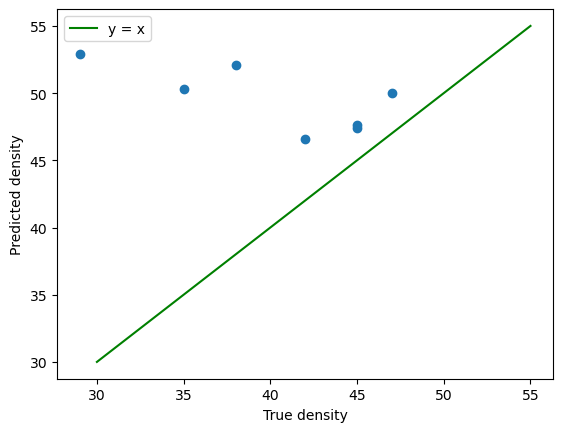

In [108]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([30, 55], [30, 55], color='green', label='y = x')
plt.legend()
plt.show()

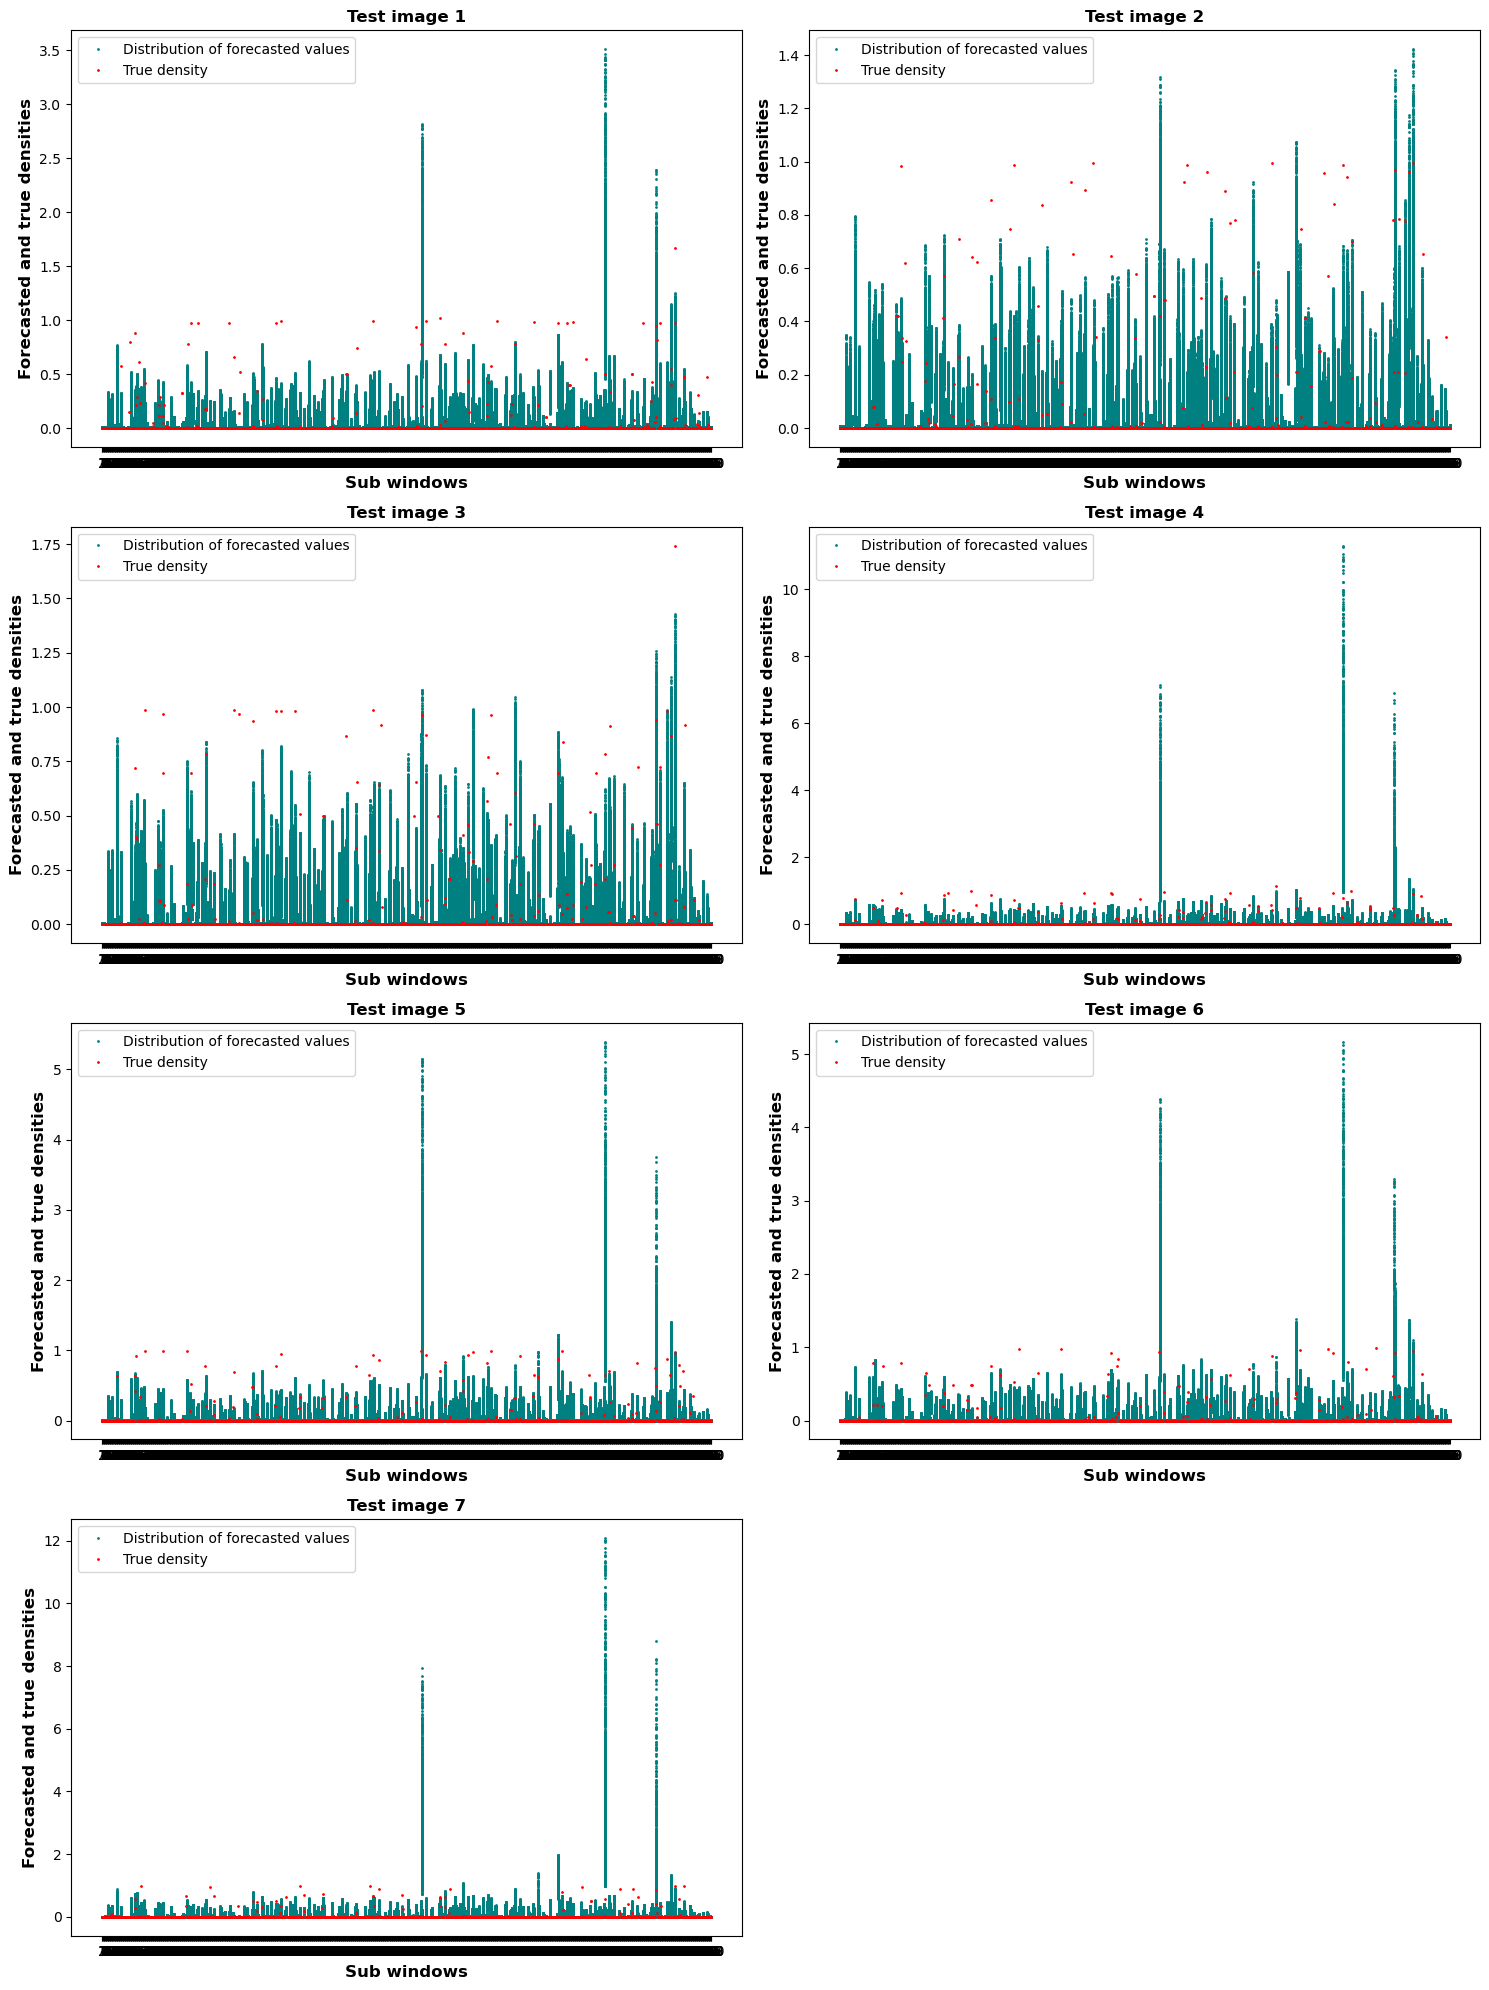

CPU times: user 27 s, sys: 764 ms, total: 27.8 s
Wall time: 27.5 s


In [106]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [107]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots